## AQ2 : Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

- Each piece of the cut should have an integer length
- He should at least cut the ribbon once
- The multiplication of the length of all the pieces be the maximum possible


In [143]:
#TODO demonstration of AQ2.2
#TODO maybe remove global variable from functions?

## AQ2.1: Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

In [100]:
import math

def findmax(n):              
    max = c([], 1, n)                       #1
    return max                              #1

def c(arr,i,n):
    global counter
    global m
    counter+=1
    if (n==0) and len(arr)>1:               #1
        product = math.prod(arr)            #len(arr) ---> (at most N)
        if product > m:                     #1
            m = product                     #1
    for j in range(i, n+1):                 #N
        counter+=1
        arr.append(j)                       #1
        c(arr, j, n-j)                      #1
        counter+=1
        arr.pop()                           #1
    return m                                #1
    

In [101]:
counter = 0
m = 0
findmax(66)

31381059609

## AQ2.2: Show that the algorithm has exponential running time

To show that the algorithm above has an exponential running time, we will do a demonstration but first we will plot the counters for the recursive part of the algorithm related to the value of n.

We did an example with n going from 2 to 25 

In [102]:
arrRecursive = []
for n in range(2, 25):
    counter = 0
    m = 0
    arrRecursive.append(findmax(n))
    print(n, ":", m)
    #print("counter for ", n, ": ", counter)

2 : 1
3 : 2
4 : 4
5 : 6
6 : 9
7 : 12
8 : 18
9 : 27
10 : 36
11 : 54
12 : 81
13 : 108
14 : 162
15 : 243
16 : 324
17 : 486
18 : 729
19 : 972
20 : 1458
21 : 2187
22 : 2916
23 : 4374
24 : 6561


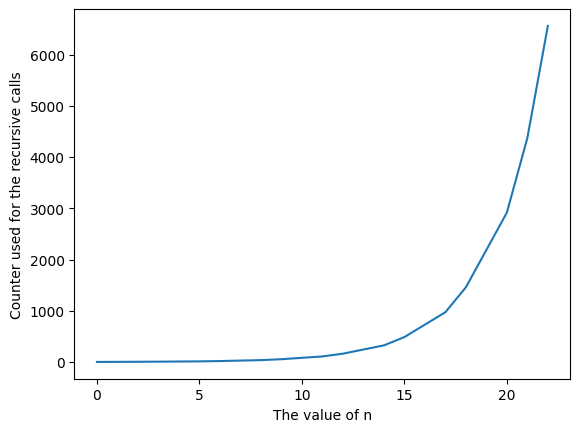

In [103]:
import matplotlib.pyplot as plt
plt.plot(arrRecursive)
#plt.plot(range(1,50))
plt.xlabel("The value of n")
plt.ylabel("Counter used for the recursive calls")
plt.show()

Demostration: (It should be O(2^N) )

## AQ2.3: Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [104]:
def dynProg(n):
    #base case
    arr = [-1,-1]
    arr.append(1)
    c = 1
    for x in range(3, n+1):
        c += 1
        arr.append(x//2 * (x//2+ x%2))
        for y in range(x-1, 2, -1):
            c += 1
            if arr[x] < (arr[y])*(x-y):
                arr[x] = arr[y]*(x-y)
    return arr[n], c


In [105]:
dynProg(66)

(31381059609, 2081)

## AQ2.4 Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

arr = []
for n in range(2, 25):

In [106]:
arrDynProg = []
for n in range(2, 25):
    arrDynProg.append(dynProg(n)[1])
    

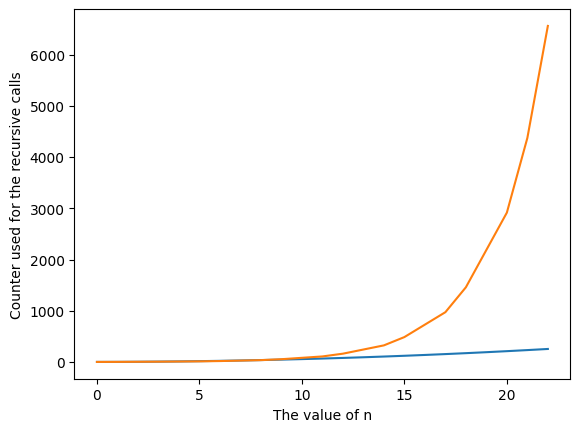

In [107]:
import matplotlib.pyplot as plt
plt.plot(arrDynProg)
plt.plot(arrRecursive)
#plt.plot(range(1,50))
plt.xlabel("The value of n")
plt.ylabel("Counter used for the recursive calls")
plt.show()

## AQ2.5 (Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

In [49]:
5//2

2